### Building & Zoning Permits

In [2]:
import requests
import pandas as pd
from pandas import json_normalize

base_url = "https://phl.carto.com/api/v2/sql"
query = """
SELECT * FROM permits
"""

params = {
    "q":query
}

results = requests.get(base_url, params)

data = results.json()

permits = pd.DataFrame(data['rows'])

permits.head()

cartodb_id                                           the_geom  \
0           1  0101000020E6100000B952A8FFC3CA52C0691B02E152FA...   
1           2  0101000020E61000007F05CEE474C552C0C81EB146AA04...   
2           3  0101000020E6100000159ED4D07BC752C09096F2A452FC...   
3           4  0101000020E6100000A2A810F125CA52C01A17C25156F6...   
4           5  0101000020E6100000033321CF3DCB52C0D4A44884C1F8...   

                                the_geom_webmercator  objectid  \
0  0101000020110F00000D791ECB91EB5FC1E390D20A9B89...         1   
1  0101000020110F0000AACA8D378DE25FC15CD034FF1195...         2   
2  0101000020110F0000D7E17FA8FEE55FC12327DC1FD28B...         3   
3  0101000020110F00008D86555185EA5FC1C44D888E3085...         4   
4  0101000020110F0000726C62B360EC5FC194522B63DE87...         5   

     permitnumber addressobjectid parcel_id_num            permittype  \
0  CP-2022-001232       133893300        420049              Building   
1  GM-2024-008835       130572974        367650  General Permit Minor   
2  PP-2020-013920       128407555        530784              Plumbing   
3  PP-2021-003762        15415193        467000              Plumbing   
4  RP-2022-010840        15383756        202367  Residential Building   

             permitdescription commercialorresidential  ... systemofrecord  \
0   Commercial Building Permit              Commercial  ...        ECLIPSE   
1         General Permit Minor             Residential  ...        ECLIPSE   
2              Plumbing Permit             Residential  ...        ECLIPSE   
3              Plumbing Permit             Residential  ...        ECLIPSE   
4  Residential Building Permit             Residential  ...        ECLIPSE   

      geocode_x      geocode_y posse_jobid usecategories  \
0  2.692183e+06  237282.350242   450683930          None   
1  2.714541e+06  267390.815915   796904146          None   
2  2.706384e+06  243393.523151   291562199          None   
3  2.695220e+06  226020.872360   324614701          None   
4  2.690230e+06  232761.462460   524387987          None   

                        occupancytype numberofunits  \
0         R-1 Residential (Transient)           1.0   
1                                None           NaN   
2                                None           NaN   
3                                None           NaN   
4  R-3 Residential (1 or 2 Dwellings)           NaN   

  certificateofoccupancyrequired certificateofoccupancydate  \
0                              N                       None   
1                           None                       None   
2                           None                       None   
3                           None                       None   
4                              N                       None   

    permitcompleteddate  
0                  None  
1                  None  
2  2021-11-03T21:41:00Z  
3  2022-01-19T19:00:26Z  
4  2023-09-11T15:28:07Z  

[5 rows x 40 columns]

In [26]:
print("\nCoordinate ranges:")
print("geocode_x range:", permits['geocode_x'].min(), "to", permits['geocode_x'].max())
print("geocode_y range:", permits['geocode_y'].min(), "to", permits['geocode_y'].max())
# Pennslyvania state plane baby!


Coordinate ranges:
geocode_x range: 2663737.2935102 to 2746995.8309707
geocode_y range: 217674.1610686 to 301353.5606011


In [27]:
print("Available columns:", permits.columns.tolist())

Available columns: ['cartodb_id', 'the_geom', 'the_geom_webmercator', 'objectid', 'permitnumber', 'addressobjectid', 'parcel_id_num', 'permittype', 'permitdescription', 'commercialorresidential', 'typeofwork', 'approvedscopeofwork', 'permitissuedate', 'status', 'applicanttype', 'contractorname', 'contractoraddress1', 'contractoraddress2', 'contractorcity', 'contractorstate', 'contractorzip', 'mostrecentinsp', 'opa_account_num', 'address', 'unit_type', 'unit_num', 'zip', 'censustract', 'council_district', 'opa_owner', 'systemofrecord', 'geocode_x', 'geocode_y', 'posse_jobid', 'usecategories', 'occupancytype', 'numberofunits', 'certificateofoccupancyrequired', 'certificateofoccupancydate', 'permitcompleteddate']


'permitdescription', 'commercialorresidential', and 'typeofwork' are the columns of interest. Filtering these will show residential zoning permits where the permit is seeking a "change of use." While not a variance, seeing areas with lots of these might allude to an increasingly residential area which could signify housing demand. 

In [29]:
# Filtering for residential zoning permits specifically & the type of permit being a change of use permit
permits = permits[
    (permits['permitdescription'] == 'Zoning Permit') & 
    (permits["commercialorresidential"] == "Residential") & 
    (permits["typeofwork"] == "Change of Use")
]

permits = permits[
    (permits["approvedscopeofwork"].str.contains("Two-Family", na=False)) |
    (permits["approvedscopeofwork"].str.contains("Multi-Family", na=False))
]

permits.head()

cartodb_id                                           the_geom  \
41           42  0101000020E610000029D29B5171C852C0ABC45911E8FD...   
67           68  0101000020E6100000F4495EFFFFC952C0249A73F37601...   
144         145  0101000020E61000000225772F8BC952C018836E8ABD03...   
192         193  0101000020E61000006F1A113AA2CF52C0E48B7F2CC5F9...   
368         369  0101000020E6100000913BEE109FC952C0FAA6B5A457FF...   

                                  the_geom_webmercator  objectid  \
41   0101000020110F00002F3D79AB9FE75FC1748E5076938D...        40   
67   0101000020110F0000D285A4DD44EA5FC10CFD714E8591...        66   
144  0101000020110F00006EB9DA727EE95FC1F7DCF7670B94...       141   
192  0101000020110F000090CD2AA3D6F35FC1BB780A0BFE88...       186   
368  0101000020110F000090BAD237A0E95FC14F2C3EEC2A8F...       363   

       permitnumber addressobjectid parcel_id_num permittype  \
41   ZP-2022-001364       133183014        477231     Zoning   
67   ZP-2020-001496        15786772        191230     Zoning   
144  ZP-2021-011261        15518665        533734     Zoning   
192  ZP-2023-002012       137339794        355207     Zoning   
368  ZP-2021-011337        15843999         73570     Zoning   

    permitdescription commercialorresidential  ...      geocode_y posse_jobid  \
41      Zoning Permit             Residential  ...  247773.795718   440351614   
67      Zoning Permit             Residential  ...  257694.551131   232662326   
144     Zoning Permit             Residential  ...  264227.139090   390946715   
192     Zoning Permit             Residential  ...  235093.508733   569577537   
368     Zoning Permit             Residential  ...  251705.926768   391789336   

                                   usecategories occupancytype numberofunits  \
41   Residential - Household Living - Two-Family          None           NaN   
67   Residential - Household Living - Two-Family          None           NaN   
144  Residential - Household Living - Two-Family          None           NaN   
192  Residential - Household Living - Two-Family          None           NaN   
368  Residential - Household Living - Two-Family          None           NaN   

    certificateofoccupancyrequired certificateofoccupancydate  \
41                            None                       None   
67                            None                       None   
144                           None                       None   
192                           None                       None   
368                           None                       None   

    permitcompleteddate  longitude   latitude  
41                 None -75.131915  39.983646  
67                 None -75.156248  40.011444  
144                None -75.149119  40.029223  
192                None -75.244275  39.951331  
368                None -75.150332  39.994864  

[5 rows x 42 columns]

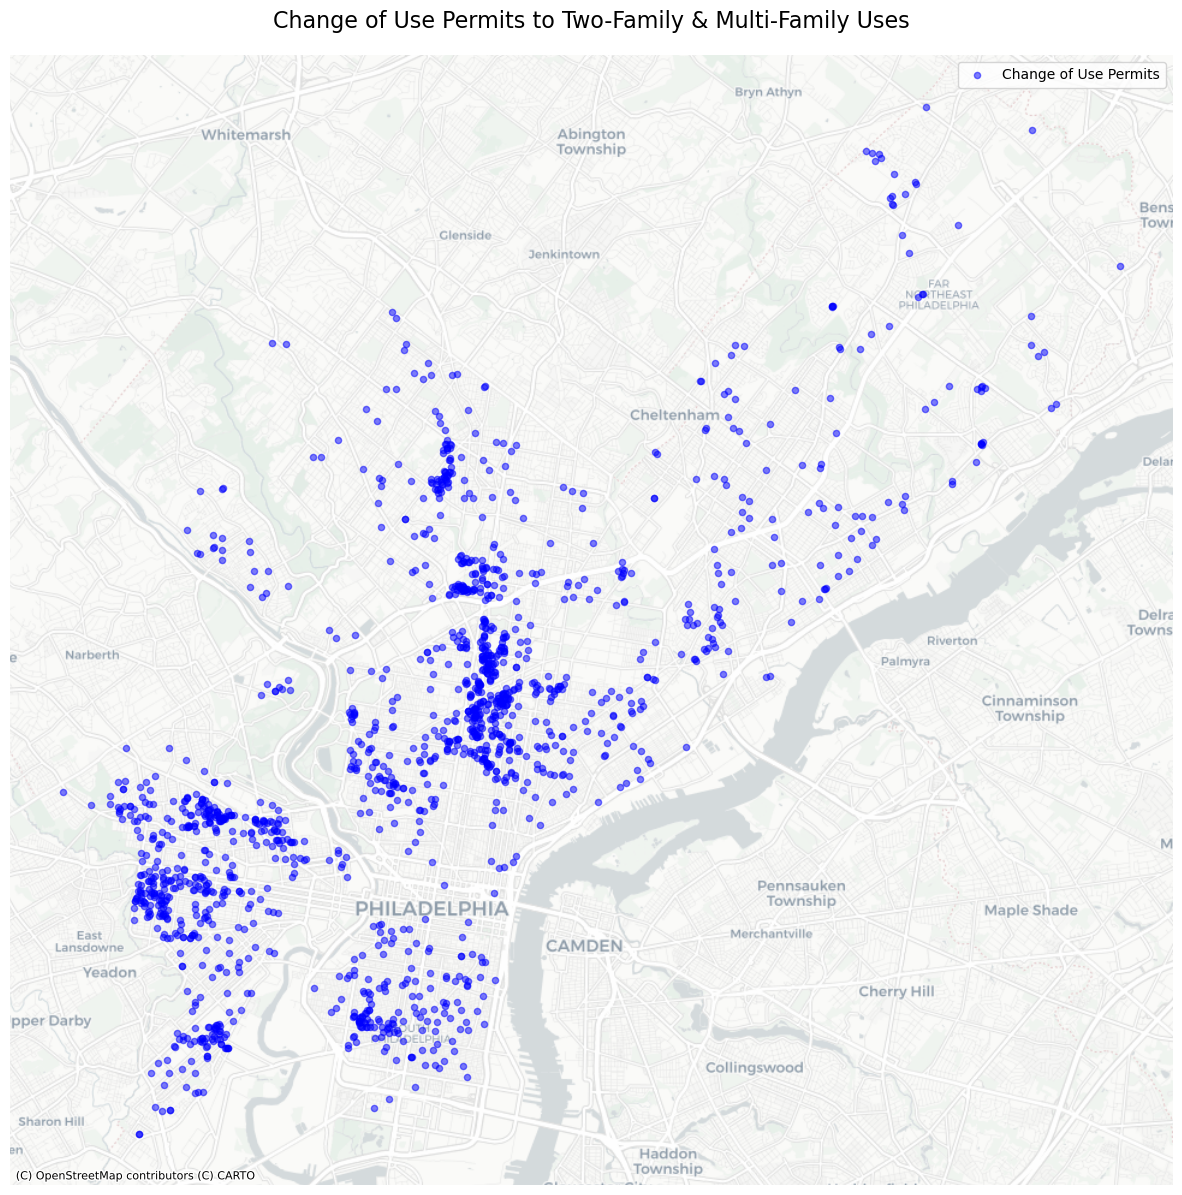

In [ ]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Transformer from PA State Plane to WGS84 (lat/long)
transformer = Transformer.from_crs("EPSG:2272", "EPSG:4326", always_xy=True)

permits['longitude'], permits['latitude'] = transformer.transform(
    permits['geocode_x'].values, 
    permits['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

gdf_web = gdf.to_crs(epsg=3857)

gdf_web.plot(ax=ax, 
             alpha=0.5, 
             c='blue',
             markersize=20,
             label='Change of Use Permits')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Change of Use Permits to Two-Family & Multi-Family Uses', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

# Years are from 2018-2024

In [35]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

In [36]:
districts.head()

OBJECTID_1  OBJECTID DISTRICT     SHAPE_LENG   Shape__Area  Shape__Length  \
0           1         1        1  107319.271435  4.017231e+07   42704.277559   
1           2         2        2  163242.842040  9.866933e+07   64896.883391   
2           3         3        3   92775.194649  3.661869e+07   36906.652590   
3           4         4        4  168377.290984  9.164117e+07   67040.969970   
4           5         5        5   96790.499546  3.095135e+07   38537.014107   

                                            geometry  
0  POLYGON ((-75.11357 39.99447, -75.11272 39.993...  
1  POLYGON ((-75.17260 39.94874, -75.17103 39.948...  
2  POLYGON ((-75.20436 39.97443, -75.20372 39.974...  
3  POLYGON ((-75.23050 40.08271, -75.23036 40.082...  
4  POLYGON ((-75.14258 40.00216, -75.14242 40.001...

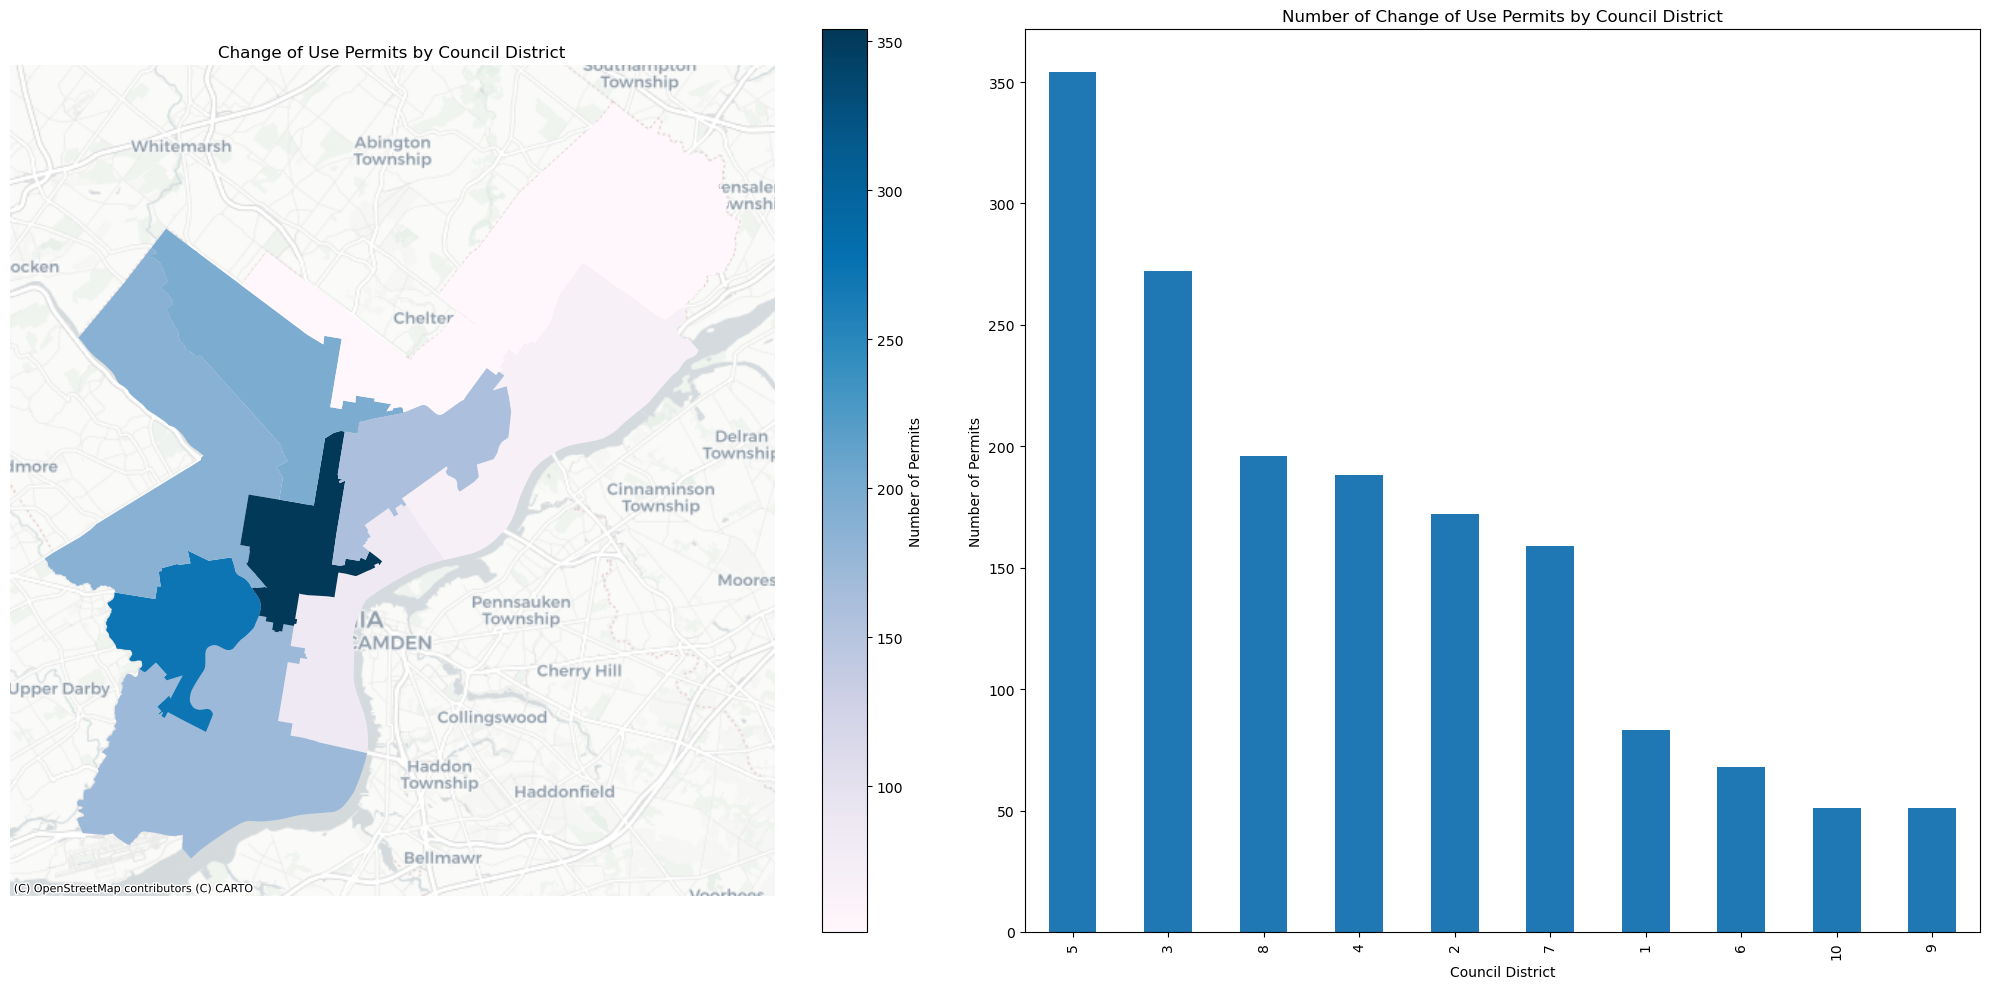

In [41]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(permits['longitude'], permits['latitude'])]
permits_gdf = gpd.GeoDataFrame(permits, geometry=geometry, crs="EPSG:4326")

districts = districts.to_crs(permits_gdf.crs)

# Spatial join permit data & council district data
permits_cc = gpd.sjoin(permits_gdf, districts, how="left", predicate="within")
permits_per_district = permits_cc.groupby('DISTRICT')['permitnumber'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(permits_per_district, left_on='DISTRICT', right_index=True)
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='permitnumber', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Permits'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Change of Use Permits by Council District')

# Bar chart of change of use permits by district
permits_per_district.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Change of Use Permits by Council District')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Permits')

plt.tight_layout()
plt.show()

### Zoning Appeals - Variances for Multi-Family

In [42]:
base_url2 = "https://phl.carto.com/api/v2/sql"
query2 = """
SELECT * FROM appeals
"""

params2 = {
    "q":query2
}

results2 = requests.get(base_url2, params2)

data2 = results2.json()

appeals = pd.DataFrame(data2['rows'])

appeals.head()

cartodb_id                                           the_geom  \
0           1  0101000020E61000009A66D30997C952C0FD1B17823CF9...   
1           2  0101000020E61000006C4C4BA2C4C652C02F2BB29A2704...   
2           3  0101000020E6100000DC2903E74FCA52C07711DCA62FF9...   
3           4  0101000020E610000032D60399BDC852C03B703BC5E5FC...   
4           5  0101000020E6100000B8845553CFCA52C0CCDA9A6577F9...   

                                the_geom_webmercator  objectid  \
0  0101000020110F00005A55059592E95FC11EDA01A36688...         1   
1  0101000020110F00008D186981C7E45FC1BCF3D20C8194...         2   
2  0101000020110F000060CC9C97CCEA5FC18327E8645888...         3   
3  0101000020110F00004EFCBC3C21E85FC163A76B2D758C...         4   
4  0101000020110F000069ED8208A5EB5FC10D0846E0A788...         5   

  addressobjectid                address unit_type unit_num         zip  \
0          593815       500-06 WALNUT ST      None     None  19106-3711   
1            2795          799 ADAMS AVE      None     None  19124-2327   
2          547064         1201 SPRUCE ST      None     None  19107-5603   
3          754561  150 CECIL B MOORE AVE      None     None  19122-0000   
4          397995         1629 LOCUST ST      None     None  19103-6304   

  opa_account_num  ...      decision meetingresult  \
0       888501268  ...  GRANTED/PROV          None   
1       882051160  ...       GRANTED          None   
2       881517950  ...  GRANTED/PROV          None   
3       183013005  ...       GRANTED          None   
4       883046300  ...     WITHDRAWN          None   

                                             proviso          decisiondate  \
0  PROVISOS: Central air conditioning; Garbage di...  2006-02-23T05:00:00Z   
1                                               None  2010-01-05T05:00:00Z   
2  **Proviso - as per plans stamped by the Board ...  2009-10-21T04:00:00Z   
3                                               None  2009-11-17T05:00:00Z   
4                                               None  2009-12-16T05:00:00Z   

  systemofrecord     geocode_x      geocode_y council_district posse_jobid  \
0         HANSEN  2.697422e+06  234340.106753             None        None   
1         HANSEN  2.708849e+06  265766.335371             None        None   
2         HANSEN  2.694264e+06  234104.314141             None        None   
3         HANSEN  2.700833e+06  244864.919870             None        None   
4         HANSEN  2.692061e+06  234837.744408             None        None   

  coordinatingrco  
0            None  
1            None  
2            None  
3            None  
4            None  

[5 rows x 39 columns]

In [72]:
# Filtering for variance appeals for multi-family housing
appeals = appeals[
    (appeals['appealtype'] == 'ZBA Permit Denial - Variance') 
]

housing_types = [
    "multi-family", "multifamily", "multi family",
    "two-family", "two family",
    "three-family", "three family",
    "multiple family"
]

construction_terms = [
    "construction", "erect", "build", "new", "proposed"
]

exclude_terms = [
    "existing", "current", "previously", "established"
]

appeals = appeals[
    ~appeals["appealgrounds"].str.contains("single[- ]?family", case=False, na=False) &
    ~appeals["appealgrounds"].str.contains('|'.join(exclude_terms), case=False, na=False)
]

multi_unit_filter = appeals["appealgrounds"].str.contains(
    '|'.join(housing_types), 
    case=False,  
    na=False
)

construction_filter = appeals["appealgrounds"].str.contains(
    '|'.join(construction_terms), 
    case=False, 
    na=False
)

appeals = appeals[multi_unit_filter & construction_filter]

appeals.head()

cartodb_id                                           the_geom  \
406           407  0101000020E610000076238373B2CB52C07290C8E689FE...   
445           446  0101000020E6100000774DECD2BFC852C03E4944E5F2FD...   
562           563  0101000020E6100000B45CAE4F77CA52C01826C4DA71FD...   
23713       23714  0101000020E61000003FF9092E75CA52C0858AB58600FE...   
25182       25183  0101000020E6100000566D68A326C952C0A4204B4FC2FD...   

                                    the_geom_webmercator  objectid  \
406    0101000020110F00009CC33FD426ED5FC1AADD13D9468E...       392   
445    0101000020110F000071D0C80425E85FC19515C3769F8D...       432   
562    0101000020110F0000CD473B880FEB5FC1F638A06F108D...       543   
23713  0101000020110F0000554A67E90BEB5FC171158D92AE8D...     23387   
25182  0101000020110F0000A3CCC6A8D3E85FC1371A619C698D...     24908   

      addressobjectid             address unit_type unit_num         zip  \
406          15353308      3017 RIDGE AVE      None     None  19121-1128   
445         129605818       2204 N 2ND ST      None     None  19133-3301   
562          15334141   1714 N BOUVIER ST      None     None  19121-3225   
23713        15340379      2012 N 18TH ST      None     None  19121-2324   
25182        15421337  2039 N RANDOLPH ST      None     None  19122-1425   

      opa_account_num  ... proviso          decisiondate systemofrecord  \
406         323047600  ...    None  2020-11-12T17:31:02Z        ECLIPSE   
445         191000034  ...    None  2020-11-23T18:50:36Z        ECLIPSE   
562         471285300  ...    None  2021-05-17T19:18:51Z        ECLIPSE   
23713       321228900  ...    None  2020-08-06T16:38:15Z        ECLIPSE   
25182       183427400  ...    None  2020-12-21T22:41:29Z        ECLIPSE   

          geocode_x      geocode_y  council_district posse_jobid  \
406    2.687756e+06  249153.859164                 5   191681250   
445    2.700706e+06  247854.351273                 7   191681998   
562    2.693235e+06  246199.152066                 5   191681910   
23713  2.693225e+06  247785.622472                 5   195391214   
25182  2.698965e+06  247262.490120                 7   195390244   

                                         coordinatingrco  longitude   latitude  
406    Strawberry Mansion Community Development Corpo... -75.182765  39.988585  
445                     Norris Square Community Alliance -75.136706  39.983976  
562                Beech Community Services Incorporated -75.163530  39.980038  
23713                                               None -75.163400  39.984392  
25182                                               None -75.142982  39.982494  

[5 rows x 41 columns]

In [73]:
print("Sample of new construction appeals (excluding existing):")
print(appeals['appealgrounds'].head())
print("\nTotal number of appeals:", len(appeals))

Sample of new construction appeals (excluding existing):
406      For the erection of a new, three (3) story att...
445      Application is for the erection of an attached...
562      Application for:\r\nFor the erection of a thre...
23713    PERMIT FOR The application is for the erection...
25182    PERMIT FOR the erection of a three story attac...
Name: appealgrounds, dtype: object

Total number of appeals: 153


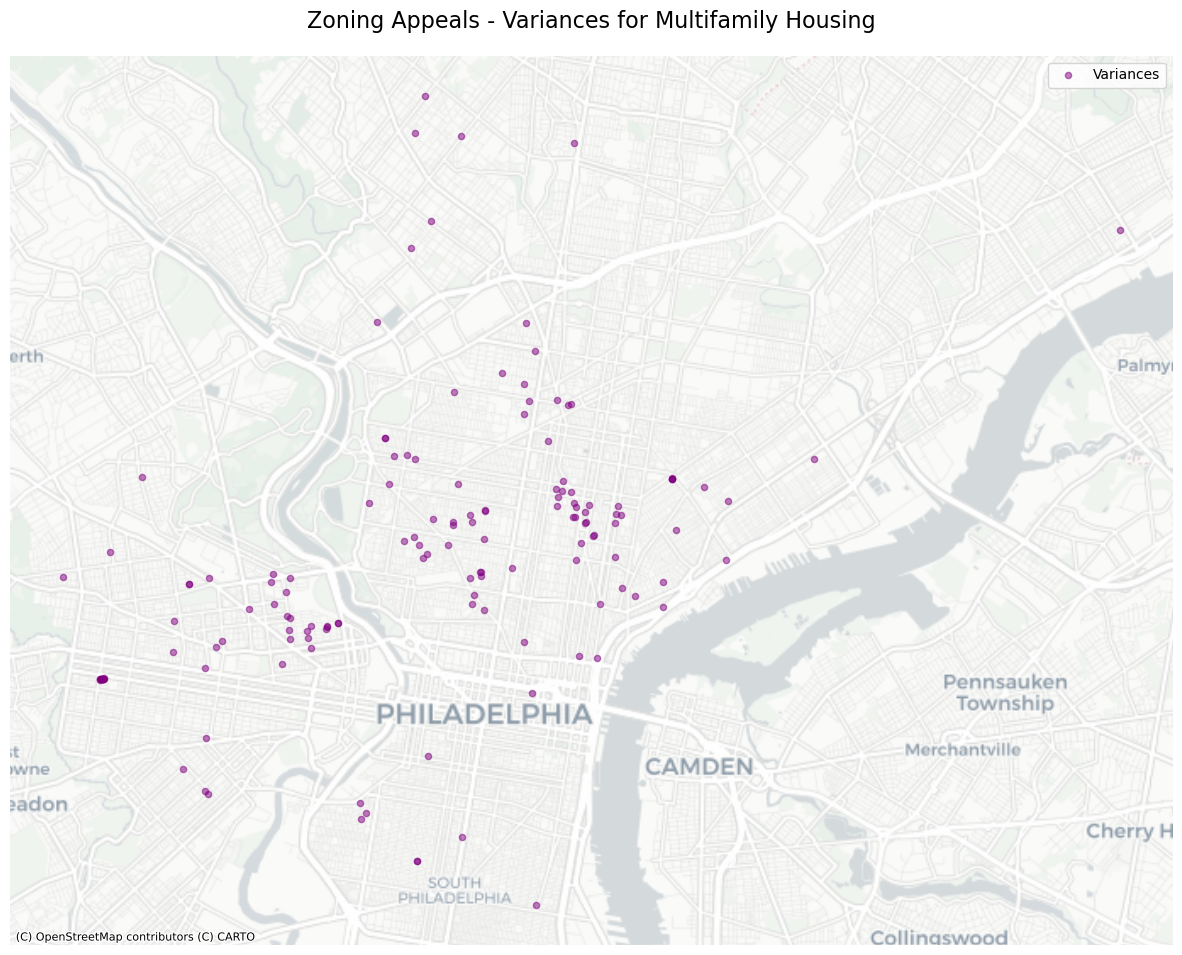

In [74]:
appeals['longitude'], appeals['latitude'] = transformer.transform(
    appeals['geocode_x'].values, 
    appeals['geocode_y'].values
)

geometry = [Point(xy) for xy in zip(appeals['longitude'], appeals['latitude'])]
appeals_gdf = gpd.GeoDataFrame(appeals, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(15, 15))

appeals_gdf = appeals_gdf.to_crs(epsg=3857)

appeals_gdf.plot(ax=ax, 
             alpha=0.5, 
             c='purple',
             markersize=20,
             label='Variances')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot customization
plt.title('Zoning Appeals - Variances for Multifamily Housing', fontsize=16, pad=20)
ax.set_axis_off()
plt.legend()

plt.show()

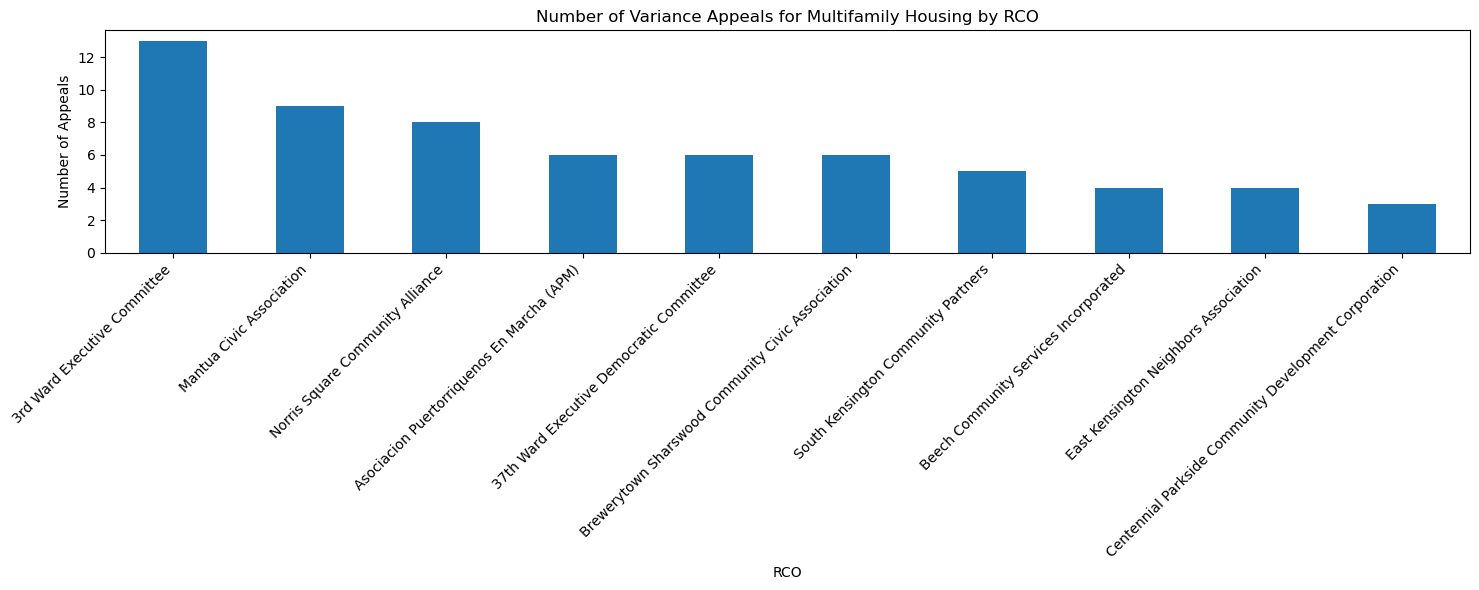

In [ ]:
# Curious which RCOs have the most variance requests 
appeals_by_rco = appeals.groupby("coordinatingrco")['objectid'].count().sort_values(ascending=False).head(10) # Apparently there are a bunch of RCOs so only going to display top ten

appeals_by_rco.plot(kind='bar', figsize=(15, 6))
plt.title('Number of Variance Appeals for Multifamily Housing by RCO')
plt.xlabel('RCO')
plt.ylabel('Number of Appeals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Coming back to this because I feel like this doesn't make sense... Mantua is zoned for multifamily already not sure why they have that many variance requests - maybe should expand the filter parameters 

In [3]:
# Maybe explore properties dataset
base_url3 = "https://phl.carto.com/api/v2/sql"
query3 = """
SELECT * FROM opa_properties_public
"""

params3 = {
    "q":query3
}

results3 = requests.get(base_url3, params3)

data3 = results3.json()

props = pd.DataFrame(data3['rows'])

props.head()

cartodb_id                                           the_geom  \
0           1  0101000020E610000029C6C53D2BCC52C0DD31054E9CF7...   
1           2  0101000020E6100000B08BC01062CB52C0B80FFF2AA3FF...   
2           3  0101000020E61000001A1448DC39CB52C0DD45FFD4CBF4...   
3           4  0101000020E610000084BBFD1FCCCB52C0785516F4F9FE...   
4           5  0101000020E6100000D94623BCE3CA52C06001DBCC5EFB...   

                                the_geom_webmercator       assessment_date  \
0  0101000020110F0000D6E1D100F4ED5FC11AC63D999986...  2024-06-06T16:05:08Z   
1  0101000020110F0000F67827499EEC5FC1F75C95A67E8F...  2024-06-06T16:10:43Z   
2  0101000020110F000094715BFE59EC5FC164CB68B77B83...  2023-05-21T02:12:25Z   
3  0101000020110F0000150E447052ED5FC12914760FC38E...  2024-06-06T16:04:17Z   
4  0101000020110F00009EC95DB3C7EB5FC1430D34E8C38A...  2024-06-06T16:12:32Z   

  basements       beginning_point book_and_page building_code  \
0      None   SWC OF DICKINSON ST          None         SR      
1      None          NEC DOVER ST          None         SC      
2      None           NWC 16TH ST          None         T38     
3      None  343'7 1/8" W 31ST ST          None         SR      
4      None     197' W OF 19TH ST          None         ZL0     

   building_code_description category_code  ... utility view_type year_built  \
0  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
1  VACANT LAND COMMER < ACRE            6   ...    None         I       None   
2  ROW B/OFF-STR 2 STY STONE            3   ...    None         I       1950   
3  VACANT LAND RESIDE < ACRE            6   ...    None         I       None   
4  MISC FUNERAL HOME MASONRY            4   ...    None         A       1920   

  year_built_estimate zip_code  zoning         pin  building_code_new  \
0                None    19146    RSA5  1001202566               None   
1                None    19132    CMX1  1001321879               None   
2                None    19145    CMX1  1001408261                820   
3                None    19132    RSA5  1001168670               None   
4                None    19130     RM1  1001494378                246   

  building_code_description_new   objectid  
0                          None  589908380  
1                          None  589908381  
2  ROW MIXED-COM/RES-BLT AS RES  589908382  
3                          None  589908383  
4                  FUNERAL HOME  589908384  

[5 rows x 81 columns]

In [4]:
props.columns

Index(['cartodb_id', 'the_geom', 'the_geom_webmercator', 'assessment_date',
       'basements', 'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade'